# Codebook for Textual Analysis on Ming Shilu

## Import Packages

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal, norm, uniform
import scipy.integrate as integrate
from ipywidgets import interact, interactive
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import pickle
import time

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

## Import 明实录

In [2]:
with open("明实录/明实录.txt", "r") as f:
    mingshilu = f.read()

## Finding countries that did tributes, order by number of times

Step 1: Identifying textual mentions of any tributary missions to Ming

In [3]:
pattern = r"\S+[国卫等]\S{0,6}遣"
matched = re.findall(pattern, mingshilu)

Step 2: Identifying the country that sends each tributary mission. The result is aggregated by country and ordered by the number of missions a country sends.

In [4]:
country_extract = r"\S+[国卫等]"
matched_country = []
for i in matched:
    matched_country.append(re.findall(country_extract, i))
matched_country = [x for x in matched_country for x in x]

enhanced_country = []
for i in [re.findall(r'福余|泰宁|灌顶|佛菻|渤利|巴里|西洋|阇婆|苏禄|耽罗|大理|哈密|尼八剌|娑罗|高丽|朝鲜|安南|日本|琉球|吕宋|合猫里|美洛居|沙瑶呐哔啴|鸡笼|婆罗|麻叶瓮|古麻|剌朗|冯嘉施兰|文郎马神|占城|真腊|暹罗|爪哇|三佛齐|浡泥|满剌加|苏门答剌|须文达那|苏禄|西洋琐里|琐里|览邦|淡巴|百花|彭亨|那孤儿|黎伐|南渤利|阿鲁|柔佛|丁机宜|巴喇西|佛郎机|和兰|古里|柯枝|葛兰|锡兰山|榜葛剌|沼纳朴儿|祖法儿|木骨都束|不剌哇|竹步|阿丹|剌撒|麻林|忽鲁谟斯|溜山|南巫里|加异勒|甘巴里|急兰丹|沙里湾泥|底里|千里达|失剌比|古里班卒|剌泥|葛达|拂菻|意大里亚|鞑靼|瓦剌|朵颜',
         i) for i in matched_country]:
    if i !=[]:
        for j in np.arange(len(i)):
            enhanced_country.append(i[j])

matched_country_df = pd.DataFrame(data = {'Country': enhanced_country})
sorted_country = pd.DataFrame({'Country':matched_country_df.groupby('Country', as_index = False).size().sort_values(ascending = False)})
sorted_country

,Country
Country,
朝鲜,645
琉球,254
占城,146
泰宁,143
安南,141
哈密,113
朵颜,109
爪哇,68
福余,63


Step 3: Manually adding the location information for each country (operated outside this notebook).

In [5]:
sorted_country.to_csv('sorted_country.csv')
### Adding location information outside the notebook and load it back
sorted_country = pd.read_csv('with_location.csv')

Define a helper function to catogorize each country's region based on their locations

In [6]:
def region_f(latitude, longtitude):
    if latitude <= 22.5 and longtitude >= 101:
        return 'southeast'
    if latitude >= 22.5 and latitude < 40 and longtitude >= 126: 
        return 'east'
    if latitude >= 40 and longtitude >= 90: 
        return 'north'
    if longtitude <= 101 and longtitude >= 90 and latitude <= 30:
        return 'southwest'
    if longtitude < 90:
        return 'west'

In [7]:
region = [region_f(sorted_country.iloc[i]['latitude'], sorted_country.iloc[i]['longitude']) for i in np.arange(len(sorted_country))]
sorted_country['region'] = region
sorted_country.sort_values(['count'], ascending = False)

,Country,count,capital,latitude,longitude,region
0,朝鲜,645,王京,37.566536,126.977966,east
1,琉球,254,首里,26.216836,127.715699,east
3,占城,146,僧伽补罗,11.573355,108.989695,southeast
2,泰宁,143,兴城,40.614802,120.736241,north
4,安南,141,河内,21.035847,105.807735,southeast
14,哈密,113,哈密,42.874296,93.537216,north
29,朵颜,109,翁牛特旗,42.933333,119.033333,north
5,爪哇,68,满者伯夷,-7.542012,112.390994,southeast
6,福余,63,扶余,44.988990,126.046841,north
25,瓦剌,62,阿尔泰,49.194047,89.076982,west


## Finding year and month for each tributary mission

Here I am defining a text extraction algorithm that searches for either a time or a mention of tribute mission.

In [8]:
month_extract = r'((洪武|建文|永乐|洪熙|宣德|正统|景泰|天顺|成化|弘治|正德|嘉靖|隆庆|万历|泰昌|天启)(\S{0,4}年)(\S{0,4}月))|(\S+[国卫等]\S{0,6}遣)'
matched_month = re.findall(month_extract, mingshilu)

I then match each mention of tribute mission with the latest time catched by the algorithm.

In [10]:
## Match tributes with month/year 

## use an iterator to record the last month and the last tribute 

final = []
date = ['洪武元年春正月', '洪武', '元年', '春正月']
for i in matched_month:
    if i[0] != '' and re.findall(r'[正一二三四五六七八九十]{1,2}月', i[3]) != []:
        date = [i[0], i[1], i[2], i[3]]
    if i[4] != '':
        _country = re.findall(r'福余|泰宁|灌顶|佛菻|渤利|巴里|西洋|阇婆|苏禄|耽罗|大理|哈密|尼八剌|娑罗|高丽|朝鲜|安南|日本|琉球|吕宋|合猫里|美洛居|沙瑶呐哔啴|鸡笼|婆罗|麻叶瓮|古麻|剌朗|冯嘉施兰|文郎马神|占城|真腊|暹罗|爪哇|三佛齐|浡泥|满剌加|苏门答剌|须文达那|苏禄|西洋琐里|琐里|览邦|淡巴|百花|彭亨|那孤儿|黎伐|南渤利|阿鲁|柔佛|丁机宜|巴喇西|佛郎机|和兰|古里|柯枝|葛兰|锡兰山|榜葛剌|沼纳朴儿|祖法儿|木骨都束|不剌哇|竹步|阿丹|剌撒|麻林|忽鲁谟斯|溜山|南巫里|加异勒|甘巴里|急兰丹|沙里湾泥|底里|千里达|失剌比|古里班卒|剌泥|葛达|拂菻|意大里亚|鞑靼|瓦剌|朵颜', i[4])
        if _country != []:
            final.append([_country[0], date])

Below is the first few rows of the dataframe of tributary missions with country and time information. Each row refers to a mission.

In [12]:
country_col = []
emperor_col = []
year_col = []
month_col = []
for i in final:
    country_col.append(i[0])
    emperor_col.append(i[1][1])
    year_col.append(i[1][2])
    month_col.append(re.findall(r'[正一二三四五六七八九十]{1,2}月',i[1][3])[0])

final_df = pd.DataFrame(data = {'Country': country_col, 'Emperor': emperor_col, 'Year': year_col, 'Month': month_col})
final_df.head(5)

,Country,Emperor,Year,Month
0,占城,洪武,二年,二月
1,安南,洪武,二年,六月
2,高丽,洪武,二年,八月
3,高丽,洪武,二年,九月
4,占城,洪武,二年,九月


Define helpers to (1) order Ming emperors  and (2) give the years of their reign for further visualizations

In [13]:
def helper(emperor):
    if emperor == '洪武':
        return 1
    if emperor == '建文':
        return 2
    if emperor == '永乐':
        return 3
    if emperor == '洪熙':
        return 4
    if emperor == '宣德':
        return 5
    if emperor == '正统':
        return 6
    if emperor == '景泰':
        return 7
    if emperor == '天顺':
        return 8
    if emperor == '成化':
        return 9
    if emperor == '弘治':
        return 10
    if emperor == '正德':
        return 11
    if emperor == '嘉靖':
        return 12
    if emperor == '隆庆':
        return 13
    if emperor == '万历':
        return 14
    if emperor == '泰昌':
        return 15
    if emperor == '天启':
        return 16

def helper1(emperor):
    if emperor == '洪武':
        return 31
    if emperor == '建文':
        return 5
    if emperor == '永乐':
        return 23
    if emperor == '洪熙':
        return 2
    if emperor == '宣德':
        return 11
    if emperor == '正统':
        return 15
    if emperor == '景泰':
        return 9
    if emperor == '天顺':
        return 8
    if emperor == '成化':
        return 24
    if emperor == '弘治':
        return 19
    if emperor == '正德':
        return 17
    if emperor == '嘉靖':
        return 47
    if emperor == '隆庆':
        return 6
    if emperor == '万历':
        return 49
    if emperor == '泰昌':
        return 1
    if emperor == '天启':
        return 8

Finally, presenting the final dataframe (with first few rows):

In [16]:
final_df['Emperor Order'] = [helper(x) for x in final_df['Emperor']]
final_df['Reign Years'] = [helper1(x) for x in final_df['Emperor']]
final_df_region = final_df.merge(sorted_country[['Country', 'capital', 'latitude', 'longitude', 'region']], on ='Country')
final_df_region.head(5)

,Country,Emperor,Year,Month,Emperor Order,Reign Years,capital,latitude,longitude,region
0,占城,洪武,二年,二月,1,31,僧伽补罗,11.573355,108.989695,southeast
1,占城,洪武,二年,九月,1,31,僧伽补罗,11.573355,108.989695,southeast
2,占城,洪武,二年,十一月,1,31,僧伽补罗,11.573355,108.989695,southeast
3,占城,洪武,三年,八月,1,31,僧伽补罗,11.573355,108.989695,southeast
4,占城,洪武,四年,七月,1,31,僧伽补罗,11.573355,108.989695,southeast


Exporting the dataframe for visualizations in Microsoft Excel and mapping in QGIS software.

In [19]:
final_df.to_csv('final.csv')

## Visualizations

#### Example 1: Korea's tributary missions by Ming emperors

Text(0.5, 1.0, '朝鲜')

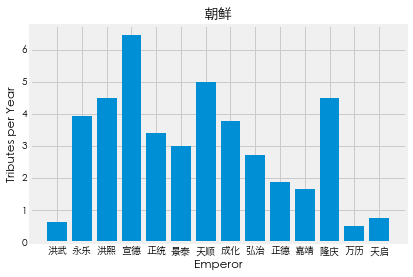

In [76]:
by_country_emperor = final_df.groupby(['Country', 'Emperor', 'Emperor Order', 'Reign Years']).size().to_frame('count').reset_index()
by_country_emperor['count density'] = by_country_emperor['count'] / by_country_emperor['Reign Years']
chaoxian = by_country_emperor[by_country_emperor['Country'] == '朝鲜'].sort_values('Emperor Order')

plt.rcParams['font.family'] = ['Heiti TC']

plt.bar(chaoxian['Emperor'], chaoxian['count density'])
plt.xlabel('Emperor')
plt.ylabel('Tributes per Year')
plt.title('朝鲜')

### Example 2: Tribute missions trend by regions

/Users/peterzhang/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


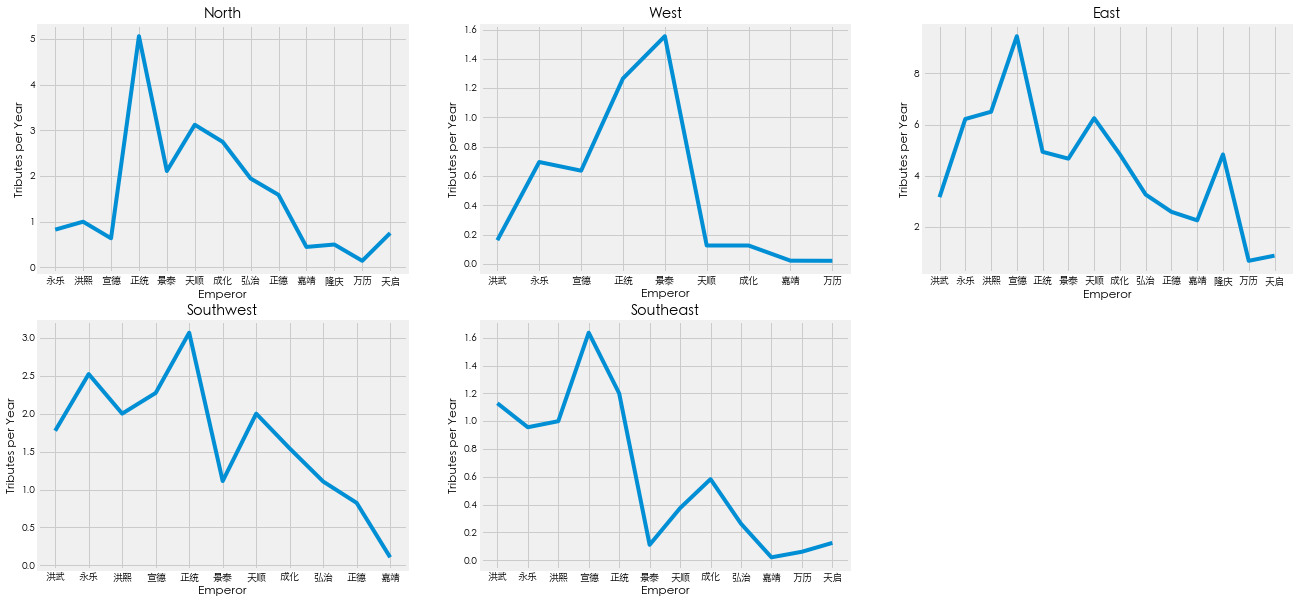

In [65]:
by_region_emperor = final_df_region.groupby(['region', 'Emperor', 'Emperor Order', 'Reign Years']).size().to_frame('count').reset_index()
by_region_emperor['count density'] = by_region_emperor['count'] / by_region_emperor['Reign Years']
location_north = by_region_emperor[by_region_emperor['region'] == 'north'].sort_values('Emperor Order')
location_west = by_region_emperor[by_region_emperor['region'] == 'west'].sort_values('Emperor Order')
location_east = by_region_emperor[by_region_emperor['region'] == 'east'].sort_values('Emperor Order')
location_southeast = by_region_emperor[by_region_emperor['region'] == 'southeast'].sort_values('Emperor Order')
location_southwest = by_region_emperor[by_region_emperor['region'] == 'southwest'].sort_values('Emperor Order')

plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['figure.figsize'] = 20, 10
fig, axs = plt.subplots(2, 3)

axs[0,0].plot(location_north['Emperor'], location_north['count density'], label = 'north')
axs[0,0].set_title('North')

axs[0,1].plot(location_west['Emperor'], location_west['count density'],label = 'west')
axs[0,1].set_title('West')

axs[0,2].plot(location_east['Emperor'], location_east['count density'], label = 'east')
axs[0,2].set_title('East')

axs[1,0].plot(location_southeast['Emperor'], location_southeast['count density'],label = 'southeast')
axs[1,0].set_title('Southwest')

axs[1,1].plot(location_southwest['Emperor'], location_southwest['count density'],label = 'southwest')
axs[1,1].set_title('Southeast')

for ax in axs.flat:
    ax.set(xlabel='Emperor', ylabel='Tributes per Year')
    
fig.delaxes(axs[1,2])
fig.show()